In [2]:
import torch
from torch import nn

#import torch vison
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


In [3]:
#getting the datasets

#setting up the training data
train_data=datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

#setting up the testing data
test_data=datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26421880/26421880 [00:05<00:00, 5077357.57it/s] 


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 274352.89it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3125284.78it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 5297418.30it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
image,label=train_data[0]
print(image)
print('\n')
print(label)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [5]:
image.shape

torch.Size([1, 28, 28])

In [6]:
len(train_data.data),len(train_data.targets),len(test_data.data),len(test_data.targets)

(60000, 60000, 10000, 10000)

In [7]:
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape is torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

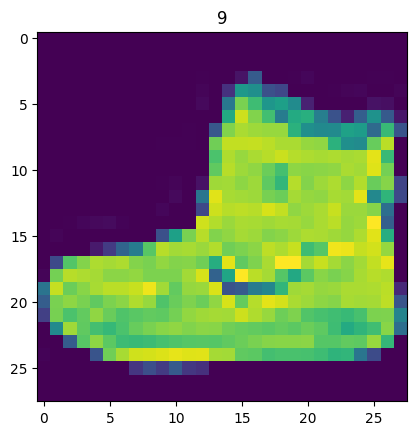

In [8]:
#visualizing our data
image, label=train_data[0]
print(f'image shape is {image.shape}')

plt.imshow(image.squeeze())
plt.title(label)


Text(0.5, 1.0, 'Ankle boot')

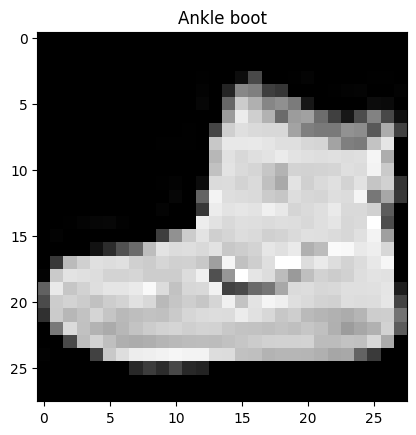

In [9]:
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])

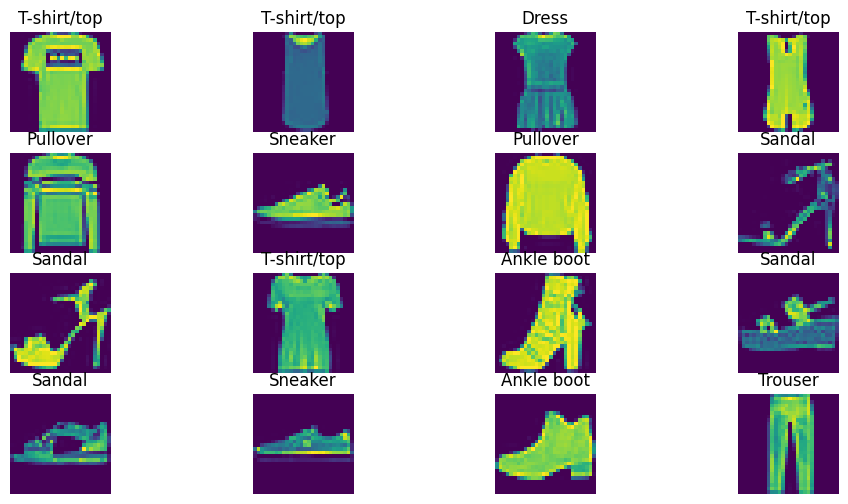

In [10]:
#plotting more images
torch.manual_seed(42)
fig=plt.figure(figsize=(12,6))
rows, cols=4,4
for i in range(1,rows*cols+1):
  # random_index=torch.randint(0,len(train_data),size=[1]).item()
  # img,label=train_data[random_index]
  img,label=train_data[i]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze())
  plt.title(class_names[label])
  plt.axis(False)


In [11]:
#preparing a dataloader
from torch.utils.data import DataLoader

batch_size=32

#turning datasets into iterables(batches)
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

#lets check what we have created
print(f'dataloaders: {train_dataloader,test_dataloader}')
print(f'length of train dataloader: {len(train_dataloader)} with batches of {batch_size}')

print(f'length of test dataloader: {len(test_dataloader)} with batches of {batch_size}')

dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x78de5fa4a5f0>, <torch.utils.data.dataloader.DataLoader object at 0x78de5ffb3520>)
length of train dataloader: 1875 with batches of 32
length of test dataloader: 313 with batches of 32


In [13]:
#checking what is insider out train dataloader
train_features_batch, train_labels_batch=next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size i torch.Size([1, 28, 28])


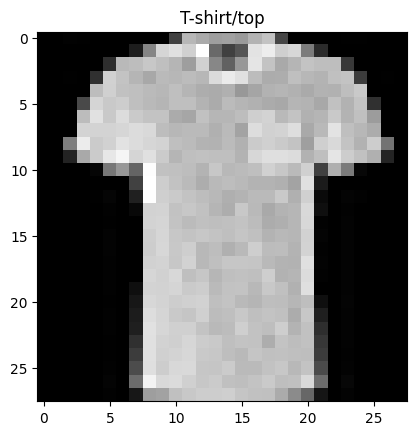

In [17]:
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
print(f'image size i {img.shape}')

In [19]:
#building a baseline model:
flatten_model=nn.Flatten()
x=train_features_batch[0]
output=flatten_model(x)
print(f'shape befor flattening: {x.shape}')

print(f'shape after flattening: {output.shape}')

shape befor flattening: torch.Size([1, 28, 28])
shape after flattening: torch.Size([1, 784])
